## Operation

In [44]:
import numpy as np

In [22]:
class Operation:
    
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def compute(self):
        pass
        

In [23]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var
        

In [24]:
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var, y_var]
        return x_var * y_var
        

In [25]:
class matmul(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var)
        

In [26]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [27]:
class Variable():
    
    def __init__(self, initial_value = None):
        self.value = initial_value
        self.output_nodes=[]
        
        _default_graph.variables.append(self)

In [28]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

In [33]:
g = Graph()
g.set_as_default()

A = Variable(10)
b = Variable(1)

x = Placeholder()
y = multiply(A,x)
z = add(y,b)

In [36]:
#Postorder traversal

def traverse_postorder(operation):
    nodes_postorder = []
    def recurse(node):
        if isinstance(node,Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
    
    recurse(operation)
    return nodes_postorder

In [37]:
class Session():
    
    def run(self,operation,feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            elif type(node) == Variable:
                node.output = node.value
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

In [40]:
sess = Session()
result = sess.run(operation = z, feed_dict = {x:10})

In [41]:
result

101

In [45]:
g = Graph()
g.set_as_default()
A = Variable([[10,20],[30,40]])
b = Variable([1,2,])
x = Placeholder()

y=matmul(A,x)
z=add(y,b)

sess = Session()
sess.run(operation = z, feed_dict = {x:10})

array([[101, 202],
       [301, 402]])

## Markdown

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [49]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

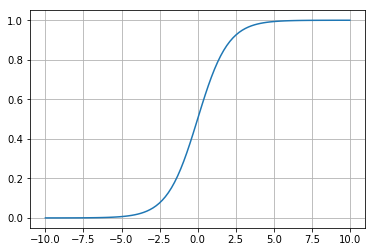

In [51]:
plt.plot(sample_z,sample_a)
plt.grid()

In [52]:
class Sigmoid(Operation):
    def __init(self,z):
        super().__init__([z])
    def compute(self,z):
        return 1/(1+np.exp(-z))

In [54]:
from sklearn.datasets import make_blobs

In [55]:
data = make_blobs(n_samples = 50, n_features =2, centers =2, random_state=75)

In [57]:
features = data[0]
labels = data[1]

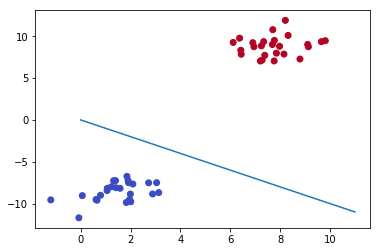

In [73]:
x = np.linspace(0,11,10)
y = -x

plt.scatter(features[:,0],features[:,1], c=labels, cmap = 'coolwarm')

plt.plot(x,y)

In [83]:
np.array([1,1]).dot(np.array([[8],[10]]))-5

array([13])

In [81]:
np.array([1,1]).dot(np.array([[2],[-10]]))-5

array([-13])

In [88]:
g = Graph()
g.set_as_default()

In [90]:
x = Placeholder()
w = Variable([1,1])

In [92]:
b = Variable(-5)

In [93]:
z = add(matmul(w,x),b)

In [95]:
a = Sigmoid([z])

In [96]:
sess = Session()

In [97]:
sess.run(operation=a, feed_dict = {x:[8,10]})

0.99999773967570205